## Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

## Load the Dataset

In [2]:
df_sal = pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Data Analysis

In [3]:
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


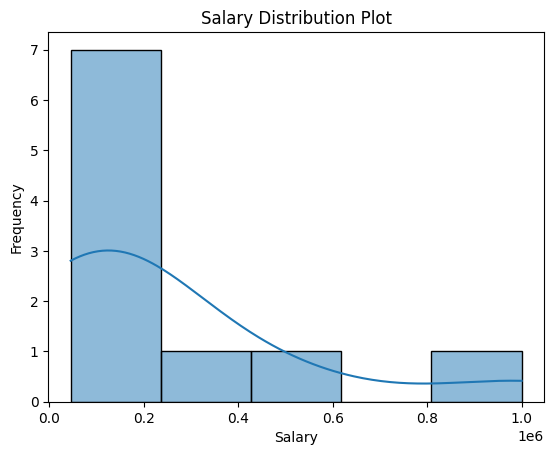

In [4]:

warnings.filterwarnings("ignore",category=FutureWarning)
plt.title('Salary Distribution Plot')
plt.xlabel('Salary')
plt.ylabel('Frequency')
sns.histplot(df_sal['Salary'],kde='True')
plt.show()

In [5]:
print('salary column contains NaN values ',df_sal['Salary'].isnull().sum())
print('Salary column contains inf values ',np.isinf(df_sal['Salary']).sum())
df_sal.columns
# output:
# salary column contains NaN values  0
# Salary column contains inf values  0
# it is  free from NAN & inf values

salary column contains NaN values  0
Salary column contains inf values  0


Index(['Position', 'Level', 'Salary'], dtype='object')

## Relationship btn Salary & Level

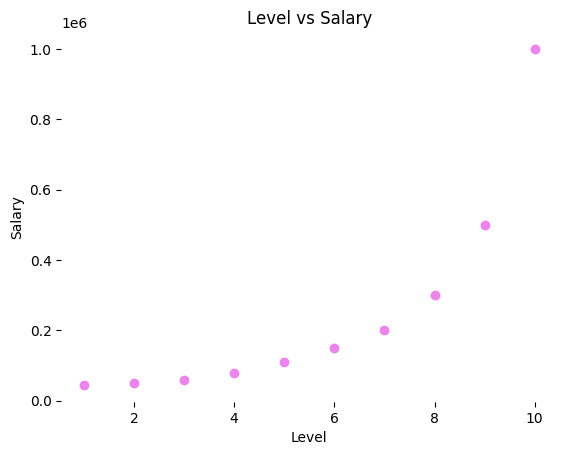

In [6]:
plt.scatter(df_sal['Level'],df_sal['Salary'],color='violet')
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

## Splitting the dataset into dependent & independent vars
 sal - dpnt,
level-indpnt

In [7]:
X = df_sal.iloc[:,1:-1].values
y = df_sal.iloc[:,-1].values
# print(X,y)

## Training 

In [8]:
#Train lr model on whole dataset since our dataset is small

lr = LinearRegression()
lr.fit(X,y)

#Train pr model on whole dataset since our dataset is small
pr = PolynomialFeatures(degree=4)
X_poly = pr.fit_transform(X)

lr_2 = LinearRegression()
lr_2.fit(X_poly,y)

LinearRegression()

## Predict the results 

In [10]:
y_pred_lr = lr.predict(X)
y_pred_poly = lr_2.predict(X_poly)

## Visualize predictions

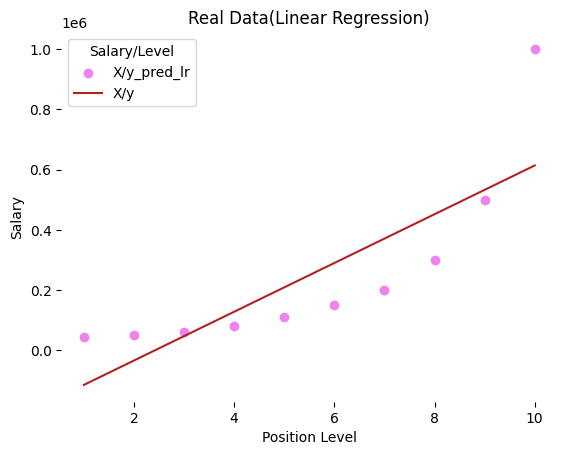

In [13]:
plt.scatter(X,y,color = 'violet')
plt.plot(X,y_pred_lr,color = 'firebrick')
plt.title('Real Data(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr','X/y'],title='Salary/Level',loc='best',facecolor='white')
plt.box(False)
plt.show()

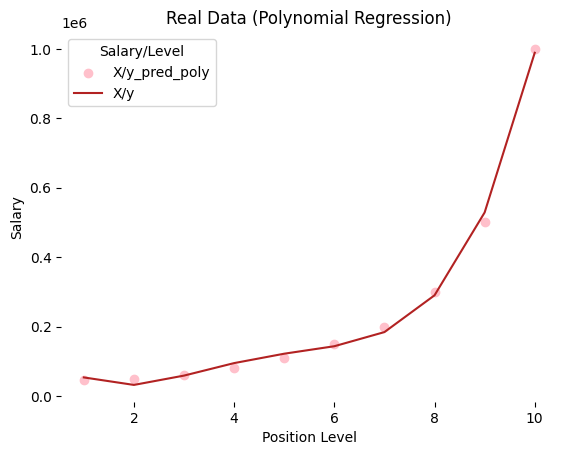

In [10]:
X_grid = np.arange(X.ravel().min(), X.ravel().max(), 0.1).reshape(-1, 1)

X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='pink')
plt.plot(X,y_pred_poly,color='firebrick')
plt.title('Real Data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly','X/y'],title = 'Salary/Level',loc='best')
plt.box(False)
plt.show()

In [11]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[7.5]])}')

# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[7.5]]))}')

Linear Regression result : [411257.57575758]
Polynomial Regression result : [225126.29297783]
